In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full = pd.read_csv('normalised_growth.csv', index_col=0, header=[0] ,parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.635906,NaN,NaN,NaN
1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.543396,NaN,NaN,NaN
1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.638258,NaN,NaN,NaN
1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.640650,NaN,NaN,NaN


In [3]:
# retain yoy
full.drop(columns=['A191RL1Q225SBEA'], inplace=True)

In [4]:
sliced = full.loc["1960-01-01":"2019-01-01"]
sliced.shape

(709, 31)

In [5]:
# which ones are null? drop them

for series in sliced:
    col = sliced[series]
    if col.isna().value_counts().loc[False] < sliced.shape[0]:
        print(series)
        sliced = sliced.drop(columns=series)
        
sliced.shape

INTDSRUSM193N
ISRATIO
MTSDS133FMS
T10Y2YM
USSLIND
GFDEGDQ188S
GS20
MCOILWTICO
TCU
TOTALSA


(709, 21)

In [6]:
y = sliced["A191RO1Q156NBEA"]
X = sliced.drop(columns="A191RO1Q156NBEA")

In [7]:
from utils import ridge_ar

Feature variable: 
A191RO1Q156NBEA
Dimensions of lagged X: 
(706, 60)
Fitting regression...


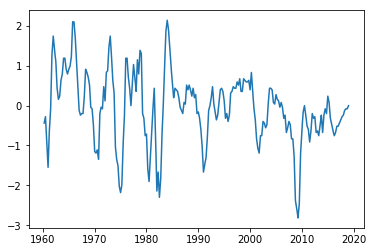

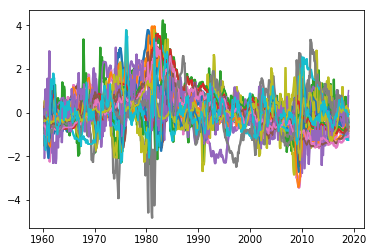

Alpha:
1.0
R squared:
0.938606508330017


In [8]:
reg = ridge_ar(y, X, 3)

In [29]:
fitted_val = pd.Series(reg.predict(pd.concat([X.shift(1), X.shift(2), X.shift(3)], axis=1)[3:]),
                      index = y.index[3:]) # copy the index from y

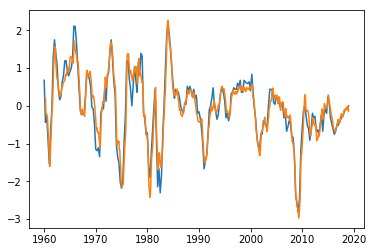

In [32]:
plt.plot(y)
plt.plot(fitted_val)
plt.show()
# not bad at all

Feature variable: 
CPIAUCSL
Dimensions of lagged X: 
(706, 60)
Fitting regression...


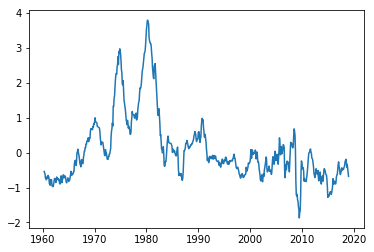

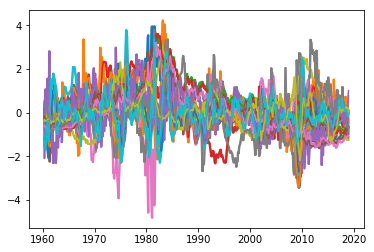

Alpha:
1.0
R squared:
0.9478342853497052


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [34]:
ridge_ar(sliced["CPIAUCSL"], sliced.drop(columns="CPIAUCSL"), 3)

Feature variable: 
UNRATE
Dimensions of lagged X: 
(706, 60)
Fitting regression...


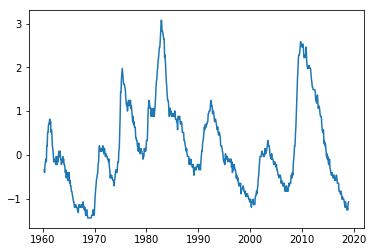

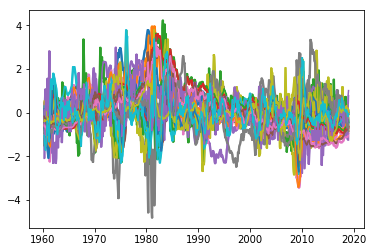

Alpha:
1.0
R squared:
0.8035699185713768


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [35]:
ridge_ar(sliced["UNRATE"], sliced.drop(columns="UNRATE"), 3)